<a href="https://colab.research.google.com/github/prithwis/parashar21/blob/main/P21_Retrieve_v4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://1.bp.blogspot.com/_5QlanosqxiQ/SXLOLTu7S7I/AAAAAAAAAm8/0r6C7lCxsic/S1600-R/p21-header-003.png) <br>


---


![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png) ||
[Prithwis Mukerjee](http://www.yantrajaal.com) ||
Website - [Parashar21](https://parashar21.blogspot.com)<br>

#SetUp

##Installs

In [1]:
!pip -qq install python-docx                #https://python-docx.readthedocs.io/en/latest/
!apt install mongodb > /dev/null

#!pip -qq install pyswisseph                 # https://stackoverflow.com/questions/64277506/pip-install-options-unclear
#!pip -qq install python_string_utils


     |████████████████████████████████| 5.6 MB 7.2 MB/s 




In [57]:
#Utility functions 
from pymongo import MongoClient
import pandas as pd
import dateutil
import json
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from datetime import datetime
from datetime import timedelta
import pytz

#import matplotlib.pyplot as plt
#import math


In [74]:
#Load p21 modules from github
!wget -O p21.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21.py                  # all global variables
!wget -O p21utils.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utils.py        # large number of utility functions
!wget -O p21utilsR.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utilsR.py 
# ---------------------------

!wget -O Saraswati.png -q https://github.com/prithwis/parashar21/raw/main/images/Saraswati02.png                  # all global variables

In [75]:
#!cat p21utils.py
import p21
import p21utils
import p21utilsR
# ------------------------------------------------
# required for multiple imports of the same module
# ------------------------------------------------
import importlib
importlib.reload(p21)
importlib.reload(p21utils)
importlib.reload(p21utilsR)

imported p21
p21utils imported
p21utilsR imported


<module 'p21utilsR' from '/content/p21utilsR.py'>

In [5]:
from google.colab import drive
drive.mount('/content/drive')
# -------------------------------------------
# copy credentials file
!cp /content/drive/'My Drive'/Praxis/WebCredentials/clevercloudMongoDB.py credentials.py
# -------------------------------------------
# MongoDB credentials are stored here
#
from credentials import rhostName,ruserName,rpassWord,rdbName,rMongoURI
print(rdbName)
# -------------------------------------------
mongoURI = rMongoURI                                   # for remote server
client = MongoClient(mongoURI)
client.list_database_names() # ['admin', 'local']
# ----------------------------------------------
# Show existing Collections
db = client.btncgfi3a5bxyea
pd.DataFrame(list(db.list_collections()))
kollection = db.khona21                   # Set the collection to work with
totalCharts = kollection.count_documents({})
print(totalCharts)

Mounted at /content/drive
btncgfi3a5bxyea


#Generate Report
for all retrieved charts

In [91]:
def genSampleReport(Sample = True):
    if Sample:
        df4Report = df.sample(5)
    else:
        df4Report = df
    
    selectedCharts = len(df)
    printCharts = len(df4Report)
    #printStatus = str(printCharts)+' charts of total '+str(totalCharts)+' printed.'
    printStatus = str(selectedCharts)+' Charts selected from '+str(totalCharts)+'. Random '+str(printCharts)+' charts printed.'

    now = datetime.now(pytz.timezone('Asia/Kolkata'))
    fileName = 'Khona21_'+now.strftime("%H%M")+'.doc'
    curQueryStr = json.dumps(selCond)
    # ---------------------------------------------------------
    p21utilsR.R01_CreateReportDoc(curQueryStr, printStatus)                      # Creates MS Word Doc called p21.document
    # ----------------------------------------------------------
    for chart in range(len(df4Report)):
        chartData =df4Report.iloc[chart]
        #R51_processChart(chartData)
        p21utilsR.R511_parseChartData(chartData)              # Break up database data into useful pieces
                                            # Creates two primary dicts, GLon, GRet
        for ctype in ['Rashi','Navamsa']:
            p21.ChartType = ctype
            p21utils.R11_LocateGrahaInRashi()   # Converts Graha Long to Rashi positions
                                                # Rashi Num as well as Rashi name
            p21utilsR.R12B_drawChart_Bengal()    # Draw Chart in Bengal style
                                                # Needs to know type, Natal or Navamsha
        #print(p21.GrahaBhava)
        print(p21.LordBhav)
        p21utilsR.R512_FormatPage()
        print('----')
    # ------------------------------------
    p21.document.save(fileName)
    


#Retrieve Charts 

In [97]:
c = kollection.find().limit(5)
for crnt in c:
    print(crnt)

{'_id': ObjectId('61e4e3df045ccda524a0ec2a'), 'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M1961101523:425.522.5788.37', 'name': 'umos'}, 'GLon': {'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'Ma': 196.183, 'Me': 193.17, 'Ju': 274.781, 'Ve': 153.753, 'Sa': 270.179, 'Ra': 122.089, 'Ke': 302.089}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': True, 'Ju': False, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}, 'BhavN': [' ', 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3], 'BhavA': [' ', 'Can', 'Leo', 'Vir', 'Lib', 'Sco', 'Sag', 'Cap', 'Acq', 'Pis', 'Ari', 'Tau', 'Gem'], 'Lord': [' ', 'Mo', 'Su', 'Me', 'Ve', 'Ma', 'Ju', 'Sa', 'Sa', 'Ju', 'Ma', 'Ve', 'Me'], 'LordRashiN': [' ', 9, 6, 7, 6, 7, 10, 10, 10, 10, 7, 6, 7], 'LordRashiA': [' ', 'Sag', 'Vir', 'Lib', 'Vir', 'Lib', 'Cap', 'Cap', 'Cap', 'Cap', 'Lib', 'Vir', 'Lib'], 'GrahaLordBhav': {'Su': [2], 'Mo': [1], 'Ma': [5, 10], 'Me': [3, 12], 'Ju': [6, 9], 'Ve': [4, 11], 'Sa': [7, 8]}, 'GRashiN': {'La': 4, 'Su'

In [ ]:
#selCond = {'pid.tags': {'$in': ['PostGraduate']}}

In [77]:
%%capture
selCond = {'GAspectedBy2.La': {'$in': ['Sa']}}
df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport()

In [78]:
%%capture
selCond = {"$and":
                    [
                       {'exaltG.Ju': {'$eq': True}},                # Exalted Jupiter
                        {'GAspectedBy2.La' : {'$in': ['Sa']}}        # La aspected by Sa          

                    ]
}

df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport()

In [79]:
%%capture
selCond = {"$and":
                    [
                       {'exaltG.Ju': {'$eq': True}},                # Exalted Jupiter
                        {'GAspectedBy2.La' : {'$in': ['Sa']}} ,       # La aspected by Sa       
                        {'GConjunctsG2.Su' : {'$in': ['Me']}}       # Su conjunct Me 

                    ]
}

df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport()

In [89]:
%%capture
selCond = {"$and":
                    [
                       {'exaltG.Ju': {'$eq': True}},                # Exalted Jupiter
                        {'GAspectedBy2.La' : {'$in': ['Sa']}} ,       # La aspected by Sa       
                        {'GConjunctsG2.Su' : {'$in': ['Me']}},    # Su conjunct Me 
                        {'GrahaBhava.Mo' : {'$eq': 1}}              # Mo in First House

                    ]
}

df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport()

[' ', 10, 9, 1, 9, 9, 10, 12, 3, 4, 4, 3, 12]
----
[' ', 10, 9, 1, 9, 9, 10, 12, 3, 4, 4, 3, 12]
----
[' ', 1, 1, 1, 12, 3, 1, 11, 11, 1, 3, 12, 1]
----
[' ', 10, 1, 10, 11, 11, 10, 1, 10, 10, 1, 10, 10]
----
[' ', 12, 12, 10, 11, 11, 10, 12, 12, 2, 1, 2, 2]
----


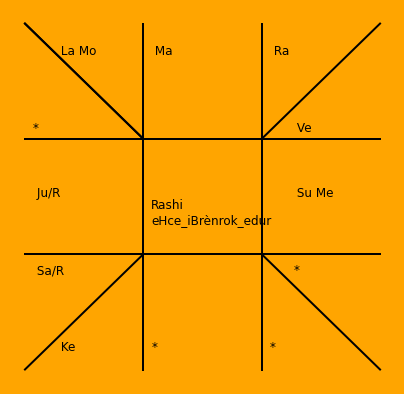

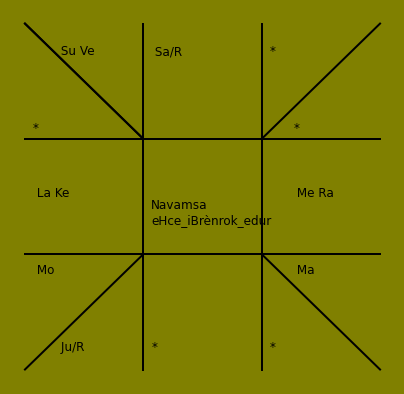

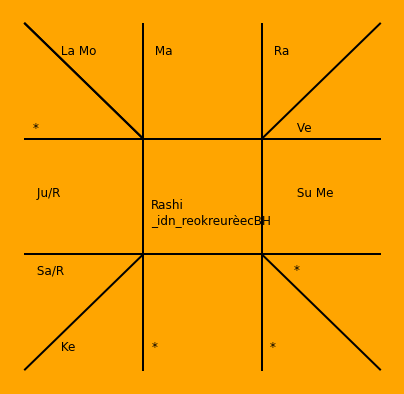

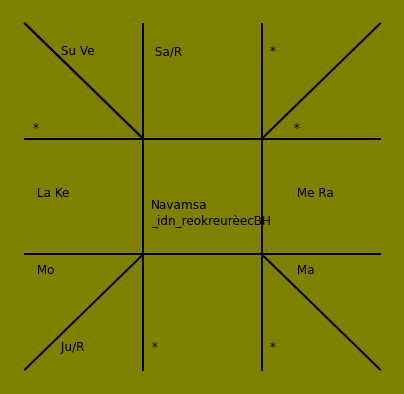

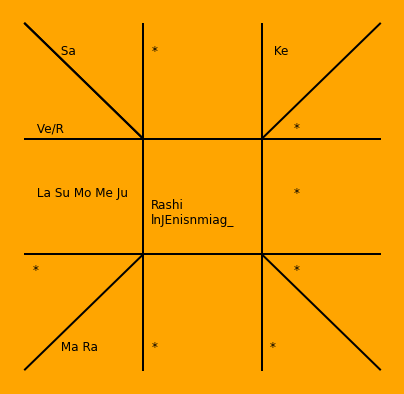

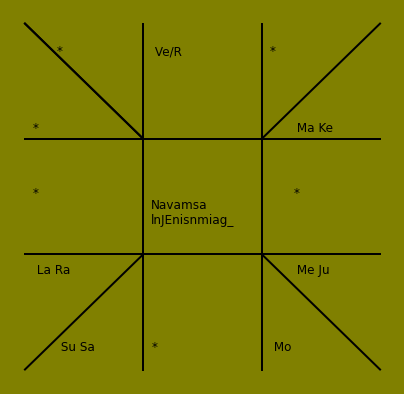

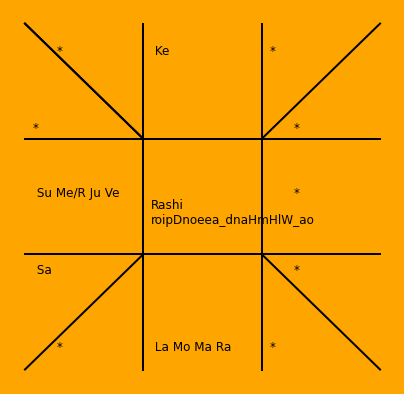

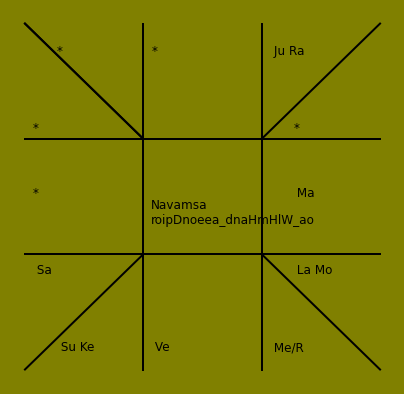

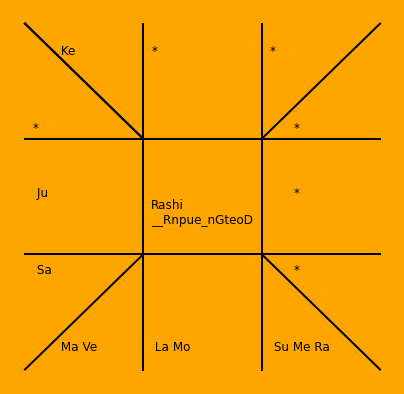

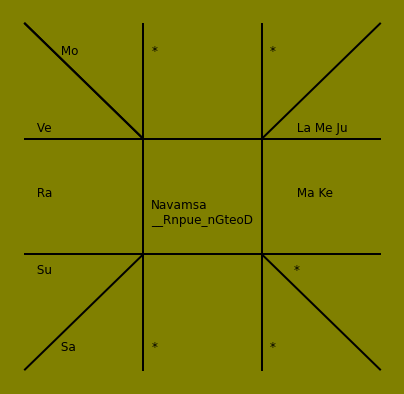

In [96]:
#%%capture
selCond = {"$and":
                    [
                       {'exaltG.Ju': {'$eq': True}},                # Exalted Jupiter
                        {'GAspectedBy2.La' : {'$in': ['Sa']}} ,       # La aspected by Sa       
                        {'GConjunctsG2.Su' : {'$in': ['Me']}},    # Su conjunct Me 
                        {'GrahaBhava.Mo' : {'$eq': 1}}              # Mo in First House
                        #{'LordBhav[4]' : {'$eq': '5'}}              # 4th Lord in 5th House

                    ]
}

df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport()

{'La': 1, 'Su': 2, 'Mo': 2, 'Ma': 5, 'Me': 2, 'Ju': 10, 'Ve': 3, 'Sa': 4, 'Ra': 6, 'Ke': 12}
----
{'La': 1, 'Su': 3, 'Mo': 2, 'Ma': 4, 'Me': 3, 'Ju': 11, 'Ve': 4, 'Sa': 7, 'Ra': 10, 'Ke': 4}
----
{'La': 1, 'Su': 11, 'Mo': 11, 'Ma': 1, 'Me': 10, 'Ju': 8, 'Ve': 12, 'Sa': 11, 'Ra': 12, 'Ke': 6}
----
{'La': 1, 'Su': 7, 'Mo': 5, 'Ma': 7, 'Me': 7, 'Ju': 1, 'Ve': 6, 'Sa': 4, 'Ra': 2, 'Ke': 8}
----
{'La': 1, 'Su': 3, 'Mo': 5, 'Ma': 4, 'Me': 3, 'Ju': 9, 'Ve': 3, 'Sa': 7, 'Ra': 4, 'Ke': 10}
----


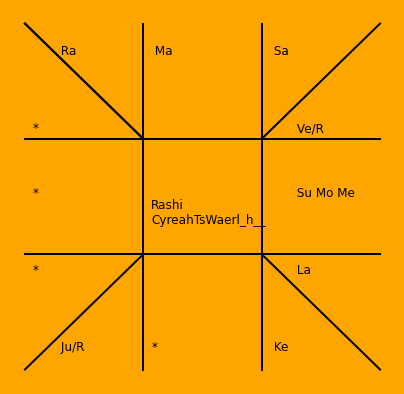

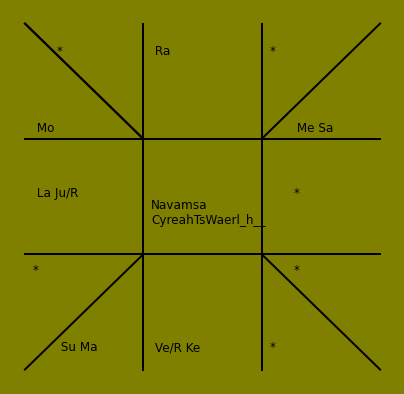

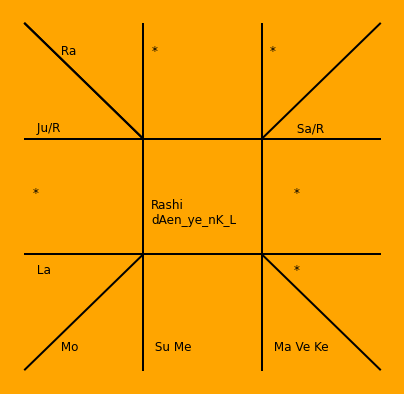

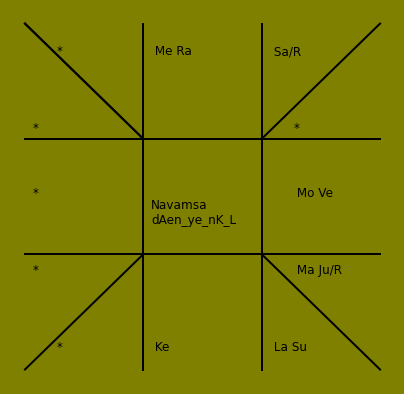

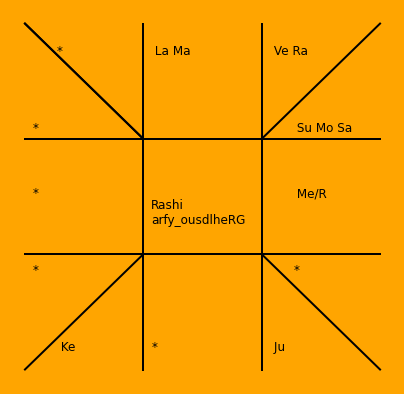

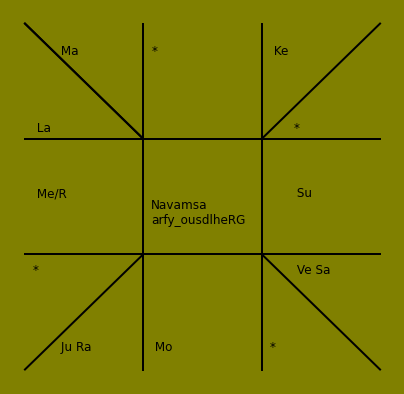

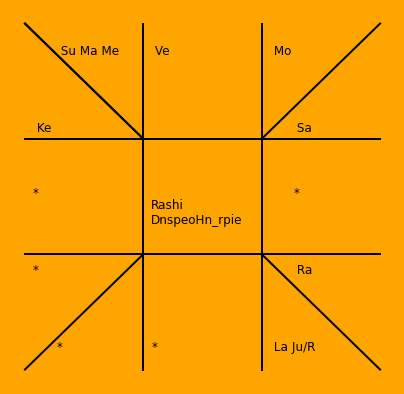

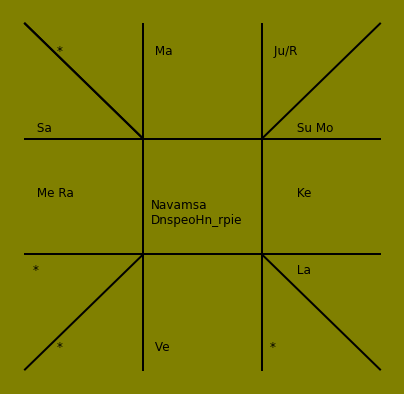

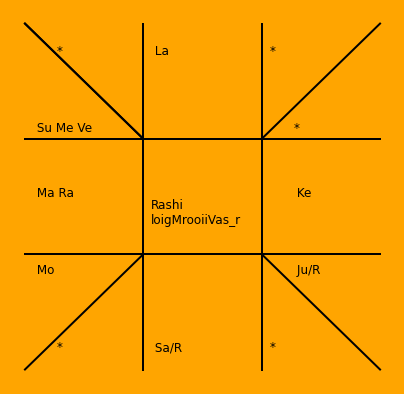

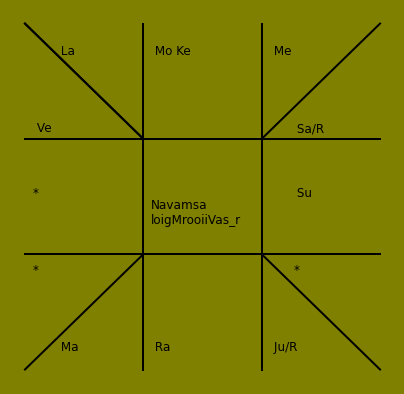

In [86]:
#%%capture
selCond = {'GAspectedBy2.La': {'$in': ['Sa']}}
df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
genSampleReport()


In [8]:
df = pd.DataFrame(list(kollection.find(selCond,p21.selCols)))
df

,pid,GLon,GRet,Lord,GrahaLordBhav,GRashiN,GrahaBhava,LordBhav,exaltG,debilG,inFriendG,inEnemyG,exaltL,debilL,inFriendL,inEnemyL,GAspects2,GAspectedBy2,BAspectedBy2,GConjunctsG2,BLConjunctsG2,BLConjunctsBL2
0,{'name': 'umos'},"{'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'M...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Mo, Su, Me, Ve, Ma, Ju, Sa, Sa, Ju, Ma, Ve...","{'Su': [2], 'Mo': [1], 'Ma': [5, 10], 'Me': [3...","{'La': 4, 'Su': 6, 'Mo': 9, 'Ma': 7, 'Me': 7, ...","{'La': 1, 'Su': 3, 'Mo': 6, 'Ma': 4, 'Me': 4, ...","[ , 6, 3, 4, 3, 4, 7, 7, 7, 7, 4, 3, 4]","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, True, False, True...","[False, False, False, True, True, False, False...","[False, False, False, False, False, False, Fal...","{'La': ['Sa', 'Ju'], 'Ma': ['Sa', 'Ju'], 'Ju':...","{'Ju': ['Ma', 'La'], 'Sa': ['Ma', 'La'], 'La':...","{'7': ['Ma', 'La'], '9': ['Su', 'Sa', 'Ve'], '...","{'Su': ['Ve'], 'Ve': ['Su'], 'Ma': ['Me'], 'Me...","{'2': ['Ve'], '3': ['Ma'], '4': ['Su'], '5': [...","{'2': ['4', '11'], '3': ['5', '10'], '4': ['2'..."
1,{'name': 'ohloa'},"{'La': 85.351, 'Su': 172.44, 'Mo': 63.984, 'Ma...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Me, Mo, Su, Me, Ve, Ma, Ju, Sa, Sa, Ju, Ma...","{'Su': [3], 'Mo': [2], 'Ma': [6, 11], 'Me': [1...","{'La': 3, 'Su': 6, 'Mo': 3, 'Ma': 2, 'Me': 6, ...","{'La': 1, 'Su': 4, 'Mo': 1, 'Ma': 12, 'Me': 4,...","[ , 4, 1, 4, 4, 4, 12, 2, 7, 7, 2, 12, 4]","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': True, 'Ma': False, 'Me': F...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","[False, True, False, False, True, False, False...","[False, False, False, False, False, True, Fals...","[False, False, True, False, False, True, False...","[False, False, False, False, False, False, Fal...","{'La': ['Sa'], 'Mo': ['Sa'], 'Ma': ['Sa'], 'Ju...","{'Sa': ['Mo', 'Ma', 'La'], 'Ra': ['Ju'], 'La':...","{'7': ['Mo', 'Ma', 'La'], '10': ['Su', 'Ju', '...","{'Su': ['Ve', 'Me'], 'Me': ['Su', 'Ve'], 'Ve':...","{'1': ['Su', 'Ve'], '3': ['Ve', 'Me'], '4': ['...","{'1': ['5', '12', '3'], '3': ['1', '5', '4', '..."
2,{'name': 'nalni'},"{'La': 84.138, 'Su': 145.068, 'Mo': 54.233, 'M...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Me, Mo, Su, Me, Ve, Ma, Ju, Sa, Sa, Ju, Ma...","{'Su': [3], 'Mo': [2], 'Ma': [6, 11], 'Me': [1...","{'La': 3, 'Su': 5, 'Mo': 2, 'Ma': 2, 'Me': 5, ...","{'La': 1, 'Su': 3, 'Mo': 12, 'Ma': 12, 'Me': 3...","[ , 3, 12, 3, 3, 3, 12, 2, 7, 7, 2, 12, 3]","{'Su': False, 'Mo': True, 'Ma': False, 'Me': F...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","[False, False, True, False, False, False, Fals...","[False, False, False, False, False, False, Fal...","[False, True, False, False, True, False, False...","[False, False, False, False, False, True, Fals...","{'La': ['Sa'], 'Ma': ['Su', 'Sa', 'Ve', 'Me'],...","{'Sa': ['Ma', 'La'], 'Su': ['Ma'], 'Me': ['Ma'...","{'7': ['Ma', 'La'], '9': ['Su', 'Sa', 'Ve', 'M...","{'Su': ['Ve', 'Me'], 'Me': ['Su', 'Ve'], 'Ve':...","{'1': ['Su', 'Ve'], '2': ['Ma'], '3': ['Ve', '...","{'1': ['5', '12', '3'], '2': ['6', '11'], '3':..."
3,{'name': 'iNDdMo'},"{'La': 191.897, 'Su': 150.533, 'Mo': 217.939, ...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Ve, Ma, Ju, Sa, Sa, Ju, Ma, Ve, Me, Mo, Su...","{'Su': [11], 'Mo': [10], 'Ma': [2, 7], 'Me': [...","{'La': 7, 'Su': 6, 'Mo': 8, 'Ma': 8, 'Me': 6, ...","{'La': 1, 'Su': 12, 'Mo': 2, 'Ma': 2, 'Me': 12...","[ , 11, 2, 5, 11, 11, 5, 2, 11, 12, 2, 12, 12]","{'Su': False, 'Mo': False, 'Ma': False, 'Me': ...","{'Su': False, 'Mo': True, 'Ma': False, 'Me': F...

In [ ]:
#df = pd.DataFrame(list(kollection.find({'pid.tags': {"$in": ['PostGraduate']}},{'pid.name':1,"_id":0,'GLon':1,'GRet':1})))
#df